In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import math

### Load and prepare data 

In [20]:
accs = pd.read_csv("data/accounts.csv")
trs = pd.read_csv("data/transactions.csv")

In [21]:
trs['date'] = pd.to_datetime(trs['date'])

### Aggregate data by account_id

In [22]:
trs_per_acc = trs.groupby('account_id')

In [23]:
for i, k in trs_per_acc: 
    print(i, len(k))
    print(k.head())

0 310
   account_id       date  amount
0           0 2020-10-16   200.0
1           0 2020-10-16  -192.0
2           0 2020-10-16   200.0
3           0 2020-10-16   -24.0
4           0 2020-10-16   -50.0
1 105
     account_id       date  amount
310           1 2020-11-09   20.00
311           1 2020-11-24 -665.55
312           1 2020-11-24  670.00
313           1 2020-11-24  100.00
314           1 2020-11-24   -5.42
2 81
     account_id       date  amount
415           2 2021-03-23  -24.80
416           2 2021-03-24  -41.80
417           2 2021-03-24  -30.00
418           2 2021-03-24  -48.15
419           2 2021-03-27  -30.00
3 98
     account_id       date  amount
496           3 2021-01-06    50.0
497           3 2021-01-08   -50.0
498           3 2021-01-13    50.0
499           3 2021-01-16   -20.0
500           3 2021-01-18   -30.0
4 1041
     account_id       date   amount
594           4 2020-09-11  1000.00
595           4 2020-09-11   -34.80
596           4 2020-09-11   -23.16

22797          58 2019-10-26   -34.00
59 606
       account_id       date    amount
23963          59 2020-10-13    100.00
23964          59 2020-11-01    -10.80
23965          59 2020-11-12     -3.53
23966          59 2020-11-12  12443.70
23967          59 2020-11-13    -98.64
60 208
       account_id       date    amount
24569          60 2021-05-10 -20403.36
24570          60 2021-05-10   -804.00
24571          60 2021-05-10   -654.00
24572          60 2021-05-10   -584.40
24573          60 2021-05-10   -461.80
61 1713
       account_id       date   amount
24777          61 2019-08-09  2000.00
24778          61 2019-08-09    -1.50
24779          61 2019-08-09    -4.95
24780          61 2019-08-09    -2.25
24781          61 2019-08-09   -28.88
62 569
       account_id       date   amount
26490          62 2019-07-17  10000.0
26491          62 2019-07-17  -2000.0
26492          62 2019-07-17   -117.5
26493          62 2019-07-17     10.0
26494          62 2019-07-18     -7.2
63 56
   

43125         121 2021-01-08  -36.99
122 91
       account_id       date  amount
43667         122 2021-04-02  -68.98
43668         122 2021-04-02  -78.90
43669         122 2021-04-03  578.92
43670         122 2021-04-06  364.62
43671         122 2021-04-06 -109.90
123 701
       account_id       date  amount
43758         123 2020-08-04  125.00
43759         123 2020-08-04    5.00
43760         123 2020-08-04   -3.05
43761         123 2020-08-04  -50.00
43762         123 2020-08-05  -50.00
124 35
       account_id       date  amount
44459         124 2019-07-25     0.0
44460         124 2019-07-25     0.0
44461         124 2019-09-11    50.0
44462         124 2019-09-11   -41.5
44463         124 2019-09-16     0.0
125 1
       account_id       date  amount
44494         125 2021-04-28  -12.23
126 561
       account_id       date  amount
44495         126 2020-09-08  700.00
44496         126 2020-09-08  -26.13
44497         126 2020-09-08  -81.15
44498         126 2020-09-09   62.36
44

63198         176 2021-02-27    50.0
177 81
       account_id       date    amount
63244         177 2020-09-04  20000.00
63245         177 2020-09-04     -7.67
63246         177 2020-09-30    -10.80
63247         177 2020-09-30     10.44
63248         177 2020-10-01    -10.80
178 169
       account_id       date   amount
63325         178 2020-07-23    -6.28
63326         178 2020-07-23  1000.00
63327         178 2020-07-27  -990.00
63328         178 2020-09-23     4.06
63329         178 2020-09-26    -6.90
179 13
       account_id       date  amount
63494         179 2020-10-02   150.0
63495         179 2020-10-05  -100.0
63496         179 2020-10-08   100.0
63497         179 2020-11-01   -10.8
63498         179 2020-11-06    10.8
180 196
       account_id       date  amount
63507         180 2020-01-17 -560.40
63508         180 2020-01-17  200.00
63509         180 2020-01-17  500.00
63510         180 2020-01-28   -6.25
63511         180 2020-01-31  -60.91
181 297
       account_id  

84383         228 2020-08-03  5000.00
229 158
       account_id       date  amount
84901         229 2021-05-17 -579.93
84902         229 2021-05-17  -80.01
84903         229 2021-05-17  -63.44
84904         229 2021-05-17  -50.00
84905         229 2021-05-17  -38.18
230 663
       account_id       date  amount
85059         230 2019-11-04    2.50
85060         230 2019-11-04    0.03
85061         230 2019-11-04    0.01
85062         230 2019-11-06    5.00
85063         230 2019-11-13    5.00
231 2187
       account_id       date  amount
85722         231 2019-02-12  150.00
85723         231 2019-02-13  -25.70
85724         231 2019-02-13   -0.88
85725         231 2019-02-13    0.88
85726         231 2019-02-26   -1.00
232 570
       account_id       date    amount
87909         232 2020-07-22  29900.00
87910         232 2020-07-22     -4.53
87911         232 2020-07-22    -23.28
87912         232 2020-07-23  -1020.00
87913         232 2020-07-27   -938.10
233 487
       account_id    

101865         272 2021-03-15   -77.64
273 13
        account_id       date  amount
102011         273 2021-04-19  1400.0
102012         273 2021-04-20  2000.0
102013         273 2021-04-20 -3400.0
102014         273 2021-04-20  1500.0
102015         273 2021-04-22 -1000.0
274 445
        account_id       date  amount
102024         274 2019-01-01   -93.0
102025         274 2019-01-02   -22.0
102026         274 2019-01-02   -22.5
102027         274 2019-01-03    -9.0
102028         274 2019-01-04  -301.5
275 844
        account_id       date  amount
102469         275 2020-03-12   37.43
102470         275 2020-03-13  -35.00
102471         275 2020-03-16  556.54
102472         275 2020-03-17  -70.01
102473         275 2020-03-17 -102.98
276 34
        account_id       date  amount
103313         276 2020-09-07    30.0
103314         276 2020-12-01   -10.8
103315         276 2020-12-07    70.0
103316         276 2020-12-10   280.0
103317         276 2020-12-23   350.0
277 169
        acc

118086         319 2020-04-06  -94.23
320 4
        account_id       date    amount
119186         320 2021-01-04  17572.58
119187         320 2021-01-05    225.73
119188         320 2021-03-06    626.69
119189         320 2021-06-05    225.00
321 296
        account_id       date  amount
119190         321 2019-02-25   210.0
119191         321 2019-02-26  -100.0
119192         321 2019-03-01   -85.0
119193         321 2019-05-14   425.0
119194         321 2019-05-14  -400.0
322 1412
        account_id       date   amount
119486         322 2020-08-12  -100.00
119487         322 2020-08-12   -29.99
119488         322 2020-08-13  2194.81
119489         322 2020-08-13   -10.94
119490         322 2020-08-13   -10.94
323 80
        account_id       date   amount
120898         323 2020-08-31   100.00
120899         323 2020-08-31    -1.74
120900         323 2020-08-31   -10.80
120901         323 2020-08-31   -12.36
120902         323 2020-09-01 -1800.00
324 2
        account_id       date 

133410         369 2019-09-16  -33.68
370 239
        account_id       date   amount
135206         370 2021-04-02   -22.50
135207         370 2021-04-02   -28.86
135208         370 2021-04-03  2600.00
135209         370 2021-04-03   100.00
135210         370 2021-04-03 -4956.89
371 79
        account_id       date  amount
135445         371 2021-04-06  -25.60
135446         371 2021-04-06  -49.40
135447         371 2021-04-06   -6.37
135448         371 2021-04-08 -110.00
135449         371 2021-04-08   -6.62
372 144
        account_id       date  amount
135524         372 2021-05-03 -471.00
135525         372 2021-05-03 -121.20
135526         372 2021-05-03  -71.08
135527         372 2021-05-03  -31.50
135528         372 2021-05-03  -30.00
373 785
        account_id       date  amount
135668         373 2020-07-30    0.50
135669         373 2020-08-03 -251.04
135670         373 2020-08-03   -1.94
135671         373 2020-08-05  545.82
135672         373 2020-08-07 -270.00
374 96
      

151772         409 2021-06-21  -100.0
410 223
        account_id       date  amount
151776         410 2019-12-10   20.00
151777         410 2019-12-12   30.00
151778         410 2019-12-12   20.00
151779         410 2019-12-16  -17.99
151780         410 2019-12-19   30.00
411 69
        account_id       date  amount
151999         411 2021-04-27  -12.00
152000         411 2021-04-29  -60.00
152001         411 2021-04-30  -42.00
152002         411 2021-04-30  -42.00
152003         411 2021-05-01  -18.15
412 57
        account_id       date  amount
152068         412 2021-04-20   100.0
152069         412 2021-05-11  7000.0
152070         412 2021-05-11  8703.0
152071         412 2021-05-12 -9272.0
152072         412 2021-05-19  6428.0
413 460
        account_id       date  amount
152125         413 2019-09-24  390.00
152126         413 2019-09-24  -95.70
152127         413 2019-09-24   -5.99
152128         413 2019-09-25  -70.80
152129         413 2019-09-25   -2.99
414 827
        acco

166491         455 2021-03-09   227.0
456 138
        account_id       date   amount
166618         456 2021-02-04 -1269.26
166619         456 2021-02-19  -150.00
166620         456 2021-03-01   -12.00
166621         456 2021-03-01    -2.40
166622         456 2021-03-02  4000.00
457 228
        account_id       date  amount
166756         457 2019-05-17  150.00
166757         457 2019-05-19  -11.40
166758         457 2019-05-20  -47.81
166759         457 2019-05-21  -89.64
166760         457 2019-05-28  120.00
458 346
        account_id       date  amount
166984         458 2020-04-24  1200.0
166985         458 2020-04-24  -114.0
166986         458 2020-04-24  -114.0
166987         458 2020-06-09  -450.0
166988         458 2020-06-12  -250.0
459 224
        account_id       date  amount
167330         459 2020-04-30   10.00
167331         459 2020-04-30   -6.63
167332         459 2020-05-04  290.00
167333         459 2020-05-04 -100.00
167334         459 2020-05-05 -100.00
460 46
     

492 77
        account_id       date  amount
178469         492 2020-08-31   20.00
178470         492 2020-08-31   -7.32
178471         492 2020-09-04  -12.00
178472         492 2020-11-30    0.40
178473         492 2021-01-25  220.00
493 13
        account_id       date  amount
178546         493 2021-02-18   100.0
178547         493 2021-02-19   -80.0
178548         493 2021-02-19   900.0
178549         493 2021-02-19  -300.0
178550         493 2021-02-19  -300.0
494 671
        account_id       date  amount
178559         494 2019-09-20  280.00
178560         494 2019-09-20   -4.27
178561         494 2019-09-20 -250.00
178562         494 2019-10-13   -4.68
178563         494 2019-10-18   -7.20
495 368
        account_id       date  amount
179230         495 2020-04-29 -1700.0
179231         495 2020-04-30    -0.2
179232         495 2020-05-12  1500.0
179233         495 2020-05-12  3335.7
179234         495 2020-05-12 -1500.0
496 78
        account_id       date   amount
179598      

192985         536 2019-10-14    0.14
537 595
        account_id       date  amount
193034         537 2020-09-07  -20.00
193035         537 2020-09-07  -40.00
193036         537 2020-09-08  -45.27
193037         537 2020-09-08 -108.00
193038         537 2020-09-08   -6.00
538 26
        account_id       date  amount
193629         538 2021-02-05  100.00
193630         538 2021-02-05  100.00
193631         538 2021-02-05  -18.95
193632         538 2021-02-05  -13.99
193633         538 2021-02-07  -15.62
539 798
        account_id       date  amount
193655         539 2020-07-06  545.82
193656         539 2020-07-08 -450.00
193657         539 2020-07-09  -14.90
193658         539 2020-07-10 -100.00
193659         539 2020-07-10  303.09
540 130
        account_id       date  amount
194453         540 2021-03-02  100.01
194454         540 2021-03-05  -80.01
194455         540 2021-03-05   -6.28
194456         540 2021-03-05   -7.20
194457         540 2021-03-05   -2.85
541 318
        acc

216680         593 2021-06-30   -39.8
594 361
        account_id       date  amount
216681         594 2019-06-12     5.0
216682         594 2019-06-18    11.2
216683         594 2019-07-02     5.6
216684         594 2019-07-18     5.1
216685         594 2019-07-29    31.7
595 372
        account_id       date  amount
217042         595 2019-10-05  -35.50
217043         595 2019-10-06  -10.42
217044         595 2019-10-06 -101.50
217045         595 2019-10-07  -21.50
217046         595 2019-10-09  -22.80
596 174
        account_id       date   amount
217414         596 2021-01-18  1000.00
217415         596 2021-01-19   -10.07
217416         596 2021-01-22  -950.00
217417         596 2021-02-03    18.67
217418         596 2021-02-04     9.82
597 2489
        account_id       date  amount
217588         597 2019-10-08   20.24
217589         597 2019-10-08  -10.80
217590         597 2019-10-24   10.24
217591         597 2019-10-24  -10.80
217592         597 2019-10-28  425.07
598 249
   

237355         644 2020-05-22  123.34
645 87
        account_id       date   amount
238040         645 2021-04-26  -142.37
238041         645 2021-04-27   -69.49
238042         645 2021-04-27  -161.84
238043         645 2021-04-27  -360.00
238044         645 2021-04-27  1520.68
646 1114
        account_id       date  amount
238127         646 2020-08-24  -23.28
238128         646 2020-08-24  837.42
238129         646 2020-08-24   -1.40
238130         646 2020-08-26    0.49
238131         646 2020-08-26  -16.97
647 236
        account_id       date   amount
239241         647 2020-12-22  -216.00
239242         647 2021-01-05   -36.00
239243         647 2021-01-11   -40.33
239244         647 2021-01-14 -8000.00
239245         647 2021-01-14    -1.00
648 346
        account_id       date   amount
239477         648 2021-03-15  -357.37
239478         648 2021-03-15   -32.64
239479         648 2021-03-15  1500.00
239480         648 2021-03-16   -25.99
239481         648 2021-03-16    -2.35


271142         703 2020-04-27    -48.0
704 1181
        account_id       date  amount
271910         704 2020-11-13  -102.0
271911         704 2020-11-13    -7.2
271912         704 2020-11-13  -102.0
271913         704 2020-11-13    -7.2
271914         704 2020-11-13  -102.0
705 111
        account_id       date  amount
273091         705 2020-11-27    8.00
273092         705 2020-11-27   -3.21
273093         705 2020-11-30   50.00
273094         705 2020-12-01  500.00
273095         705 2020-12-01 -500.00
706 1358
        account_id       date  amount
273202         706 2018-09-11   37.00
273203         706 2018-09-13  -30.00
273204         706 2018-09-13   -0.50
273205         706 2018-09-24   77.86
273206         706 2018-09-26  -80.00
707 856
        account_id       date  amount
274560         707 2020-08-14   295.0
274561         707 2020-08-15   -50.0
274562         707 2020-08-15    -5.0
274563         707 2020-08-15   -39.9
274564         707 2020-08-16   -29.5
708 599
       

294862         751 2021-03-25   46.29
752 86
        account_id       date   amount
295038         752 2021-01-05   -22.60
295039         752 2021-01-14  4363.92
295040         752 2021-01-15  2700.00
295041         752 2021-01-18   -20.00
295042         752 2021-02-02   -22.60
753 58
        account_id       date  amount
295124         753 2020-10-21   98.28
295125         753 2020-10-21    0.06
295126         753 2020-10-21    0.15
295127         753 2020-10-25  -24.00
295128         753 2020-10-28  300.00
754 116
        account_id       date  amount
295182         754 2021-03-12    -4.9
295183         754 2021-03-23     5.0
295184         754 2021-04-12   120.0
295185         754 2021-04-12    -4.9
295186         754 2021-04-13    15.0
755 380
        account_id       date  amount
295298         755 2020-05-11  600.00
295299         755 2020-05-12  -11.88
295300         755 2020-05-12  -11.88
295301         755 2020-05-13  -11.88
295302         755 2020-05-15 -420.00
756 848
      

309742         793 2021-04-26    -7.99
794 390
        account_id       date  amount
309916         794 2020-08-10   70.00
309917         794 2020-08-11   -3.59
309918         794 2020-08-11  -42.38
309919         794 2020-08-11   -4.47
309920         794 2020-08-11  -10.90
795 10
        account_id       date   amount
310306         795 2021-04-21  -178.77
310307         795 2021-04-22 -1150.00
310308         795 2021-04-22 -1000.00
310309         795 2021-04-22  -150.00
310310         795 2021-04-27   -35.44
796 2
        account_id       date  amount
310316         796 2020-09-30    1.26
310317         796 2021-06-01    1.12
797 853
        account_id       date  amount
310318         797 2019-02-05  426.72
310319         797 2019-02-05   27.39
310320         797 2019-02-07 -400.00
310321         797 2019-02-07  -20.00
310322         797 2019-02-07   -0.50
798 81
        account_id       date   amount
311171         798 2020-06-12  1500.00
311172         798 2020-06-12     0.00
3111

326955         845 2020-02-16  -720.00
846 1019
        account_id       date  amount
327148         846 2018-05-18  560.00
327149         846 2018-05-18  240.00
327150         846 2018-05-18  240.00
327151         846 2018-05-28  -48.65
327152         846 2018-05-30  560.00
847 1481
        account_id       date  amount
328167         847 2018-01-02 -139.85
328168         847 2018-01-02  -48.31
328169         847 2018-01-02   -7.45
328170         847 2018-01-02  -44.80
328171         847 2018-01-03 -139.01
848 42
        account_id       date   amount
329648         848 2020-11-16  -229.60
329649         848 2020-11-25  1500.00
329650         848 2020-12-10   -31.17
329651         848 2020-12-10  1500.00
329652         848 2020-12-11   -39.90
849 401
        account_id       date  amount
329690         849 2020-05-21  850.00
329691         849 2020-05-21   -6.98
329692         849 2020-05-22  850.30
329693         849 2020-05-22  -20.00
329694         849 2020-05-23 -300.00
850 107
  

346635         893 2019-09-17    0.12
894 1305
        account_id       date  amount
348428         894 2019-08-07  -16.90
348429         894 2019-08-23  -16.90
348430         894 2019-09-02   20.14
348431         894 2019-09-09   19.24
348432         894 2019-09-10   -5.50
895 291
        account_id       date  amount
349733         895 2019-01-31  342.87
349734         895 2019-02-01  129.70
349735         895 2019-02-12 -472.57
349736         895 2019-03-05  386.91
349737         895 2019-03-13 -386.91
896 95
        account_id       date   amount
350024         896 2021-04-26  15000.0
350025         896 2021-04-27  -4980.0
350026         896 2021-04-28  -4990.0
350027         896 2021-04-28  -1014.0
350028         896 2021-04-29  -4995.0
897 2221
        account_id       date  amount
350119         897 2019-11-19     1.0
350120         897 2019-11-22   100.0
350121         897 2019-11-26  -100.0
350122         897 2019-11-26    44.0
350123         897 2019-11-26    -2.4
898 101
   

366046         937 2019-09-18    -1.20
938 492
        account_id       date  amount
366722         938 2020-07-09   -4.99
366723         938 2020-07-10  -10.00
366724         938 2020-07-10   -2.49
366725         938 2020-07-10   -1.29
366726         938 2020-07-10   -8.00
939 467
        account_id       date  amount
367214         939 2020-03-05   500.0
367215         939 2020-03-05   -10.8
367216         939 2020-03-12  -200.0
367217         939 2020-03-12    10.0
367218         939 2020-03-12   -50.0
940 301
        account_id       date  amount
367681         940 2021-01-11   505.0
367682         940 2021-01-11   500.0
367683         940 2021-01-11  -500.0
367684         940 2021-01-11  -200.0
367685         940 2021-01-12   500.0
941 261
        account_id       date  amount
367982         941 2020-10-15  800.00
367983         941 2020-10-20   80.00
367984         941 2020-10-21  117.12
367985         941 2020-11-05  130.78
367986         941 2020-11-06  350.00
942 355
        a

385508         976 2020-09-10 -194.46
977 488
        account_id       date   amount
385718         977 2020-08-24   -13.09
385719         977 2020-08-24   -48.49
385720         977 2020-08-24    -7.10
385721         977 2020-08-25 -1024.00
385722         977 2020-08-25  -211.23
978 2
        account_id       date  amount
386206         978 2020-12-30     2.0
386207         978 2021-01-02    -1.0
979 486
        account_id       date  amount
386208         979 2020-10-28    20.0
386209         979 2020-11-02   -10.0
386210         979 2020-11-02    -2.0
386211         979 2020-11-02    -5.0
386212         979 2020-11-05   250.0
980 486
        account_id       date  amount
386694         980 2020-10-28    20.0
386695         980 2020-11-02   -10.0
386696         980 2020-11-02    -2.0
386697         980 2020-11-02    -5.0
386698         980 2020-11-05   250.0
981 19
        account_id       date  amount
387180         981 2021-05-05   100.0
387181         981 2021-05-05   -10.0
387182 

403386        1020 2020-11-30    19.0
1021 795
        account_id       date   amount
403463        1021 2019-10-18   1000.0
403464        1021 2019-10-22  14320.0
403465        1021 2019-10-31     -9.3
403466        1021 2019-10-31    -15.0
403467        1021 2019-10-31    -30.5
1022 53
        account_id       date   amount
404258        1022 2020-08-31     0.10
404259        1022 2020-08-31     0.07
404260        1022 2020-09-16    30.00
404261        1022 2020-09-29  1500.00
404262        1022 2020-10-01  -500.00
1023 24
        account_id       date  amount
404311        1023 2019-10-09  1000.0
404312        1023 2019-10-09   -10.8
404313        1023 2019-11-08   -10.8
404314        1023 2019-11-18  -792.0
404315        1023 2019-11-18    -1.6
1024 122
        account_id       date  amount
404335        1024 2020-06-17   70.00
404336        1024 2020-07-09  -50.00
404337        1024 2020-07-16   -7.89
404338        1024 2020-07-17  -10.80
404339        1024 2020-07-23   50.00
1025

426166        1068 2021-05-03   -0.01
1069 24
        account_id       date   amount
426634        1069 2020-06-10     9.20
426635        1069 2020-06-10    -1.44
426636        1069 2020-10-09  1500.00
426637        1069 2020-10-09 -1500.00
426638        1069 2020-11-30   -10.80
1070 24
        account_id       date   amount
426658        1070 2021-02-25   936.25
426659        1070 2021-02-28  -400.00
426660        1070 2021-02-28  -100.00
426661        1070 2021-03-04  -212.07
426662        1070 2021-03-04  1938.00
1071 156
        account_id       date  amount
426682        1071 2020-01-06  -22.03
426683        1071 2020-01-09  150.00
426684        1071 2020-01-10  675.46
426685        1071 2020-01-16  -47.75
426686        1071 2020-01-21  -42.24
1072 132
        account_id       date  amount
426838        1072 2020-05-04  120.00
426839        1072 2020-05-21  -10.80
426840        1072 2020-06-16  -12.90
426841        1072 2020-06-20  -17.05
426842        1072 2020-06-21  -10.80
1073

445599        1112 2021-04-01  -10.80
1113 206
        account_id       date  amount
445622        1113 2021-03-06   72.83
445623        1113 2021-03-08  -50.01
445624        1113 2021-03-08 -274.42
445625        1113 2021-03-08 -530.04
445626        1113 2021-03-08   -9.00
1114 258
        account_id       date  amount
445828        1114 2020-10-01   -0.06
445829        1114 2020-10-01   -0.41
445830        1114 2020-10-01  170.00
445831        1114 2020-10-01 -162.94
445832        1114 2020-10-03   -8.75
1115 266
        account_id       date  amount
446086        1115 2020-02-05   30.00
446087        1115 2020-02-06   -4.83
446088        1115 2020-02-07  -20.00
446089        1115 2020-02-09   -1.95
446090        1115 2020-02-16   -2.70
1116 505
        account_id       date  amount
446352        1116 2020-07-13  -15.29
446353        1116 2020-07-14  -22.32
446354        1116 2020-07-14 -135.55
446355        1116 2020-07-14  -40.00
446356        1116 2020-07-15  -39.26
1117 429
     

464306        1155 2020-09-04     0.0
1156 30
        account_id       date  amount
465485        1156 2020-06-16   327.0
465486        1156 2020-06-16   -10.8
465487        1156 2020-06-16   -10.8
465488        1156 2020-06-16   -10.8
465489        1156 2020-06-16   -10.8
1157 947
        account_id       date   amount
465515        1157 2020-08-10  1500.00
465516        1157 2020-08-10    -8.28
465517        1157 2020-08-10 -1400.00
465518        1157 2020-08-16   -90.00
465519        1157 2020-09-01   -32.14
1158 71
        account_id       date  amount
466462        1158 2021-05-17 -563.60
466463        1158 2021-05-17  256.64
466464        1158 2021-05-18   19.92
466465        1158 2021-05-20   19.92
466466        1158 2021-05-20   64.75
1159 102
        account_id       date  amount
466533        1159 2020-09-18  100.00
466534        1159 2020-09-18   -4.18
466535        1159 2020-09-18    8.54
466536        1159 2020-09-29  -10.80
466537        1159 2020-09-30   10.08
1160 6
   

490030        1207 2020-05-27   -3.00
1208 587
        account_id       date   amount
490200        1208 2020-02-12  1000.00
490201        1208 2020-04-02  1094.10
490202        1208 2020-04-09  -291.73
490203        1208 2020-04-26   -12.00
490204        1208 2020-05-04  -274.93
1209 1633
        account_id       date  amount
490787        1209 2019-08-01  1584.0
490788        1209 2019-08-02  1265.0
490789        1209 2019-08-02  7798.8
490790        1209 2019-08-06 -1500.0
490791        1209 2019-08-06 -1500.0
1210 52
        account_id       date  amount
492420        1210 2020-10-21   -3.14
492421        1210 2020-10-21   28.35
492422        1210 2020-10-21  -10.80
492423        1210 2020-10-21  -10.80
492424        1210 2020-10-23   24.88
1211 564
        account_id       date  amount
492472        1211 2020-08-31    0.81
492473        1211 2020-09-07   71.93
492474        1211 2020-09-07   20.00
492475        1211 2020-09-07   -9.75
492476        1211 2020-09-07  -17.76
1212 229

### Get the data of one account (in particular 1248)

In [24]:
acc_1248 = trs_per_acc.get_group(1248)

### Get positive and negative transactions and visualize the data

In [25]:
acc_1248_negative = acc_1248[acc_1248['amount'] < 0]
acc_1248_positive = acc_1248[acc_1248['amount'] > 0]

In [26]:
acc_1248_negative.head(5)

,account_id,date,amount
512235,1248,2018-01-04,-6.00
512236,1248,2018-01-06,-9.32
512237,1248,2018-01-06,-13.13
512240,1248,2018-02-09,-18.80
512241,1248,2018-02-10,-6.29


In [27]:
acc_1248_negative.set_index(['date'], inplace = True)
acc_1248_positive.set_index(['date'], inplace = True)

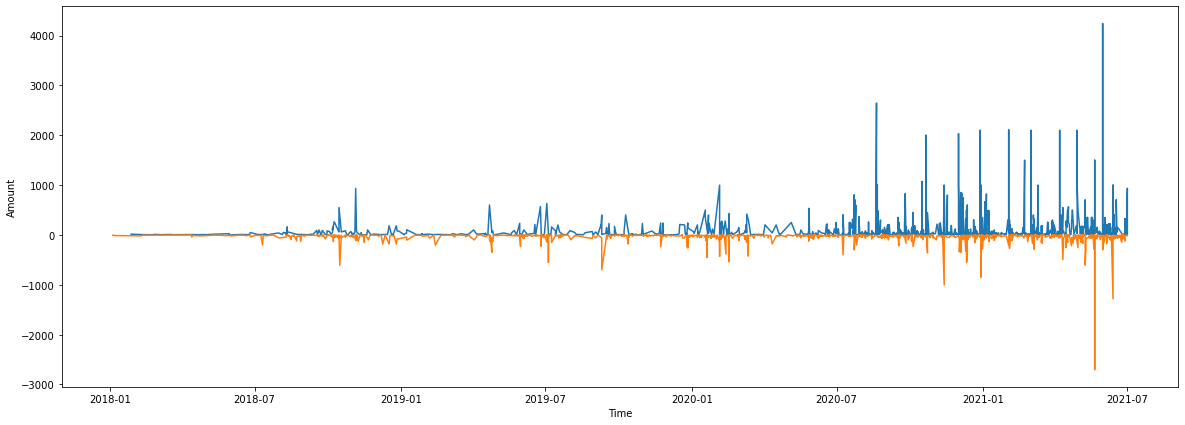

In [28]:
plt.figure(figsize = (20, 7))
plt.xlabel("Time")
plt.ylabel("Amount")
plt.plot(acc_1248_positive.amount)
plt.plot(acc_1248_negative.amount)
plt.show()


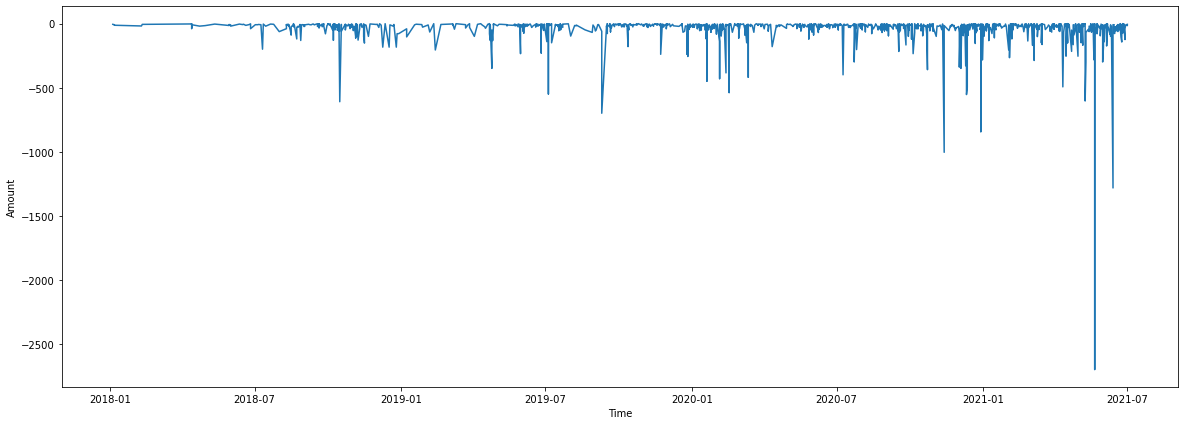

In [29]:
plt.figure(figsize = (20, 7))
plt.xlabel("Time")
plt.ylabel("Amount")

plt.plot(acc_1248_negative.amount)
plt.show()

### Moving Average for individual account's unevenly spaced time series. 

#### Moving Average computed on a rolling window of 7 steps (weekly)

In [30]:
ma_acc_1248_negative = acc_1248_negative.amount.rolling(7).mean()

In [31]:
ma_acc_1248_negative

date
2018-01-04          NaN
2018-01-06          NaN
2018-01-06          NaN
2018-02-09          NaN
2018-02-10          NaN
                ...    
2021-06-28   -30.852857
2021-06-28   -34.621429
2021-06-29   -33.905714
2021-07-01   -35.461429
2021-07-01   -34.945714
Name: amount, Length: 1594, dtype: float64

In [32]:
# Here you should decide wether to : 

# 1- fill the Nans 
# ma_acc_1248_negative.bfill(inplace= True)
# ma_acc_1248_negative

# 2- or throw them away 
ma_acc_1248_negative = ma_acc_1248_negative[4:]

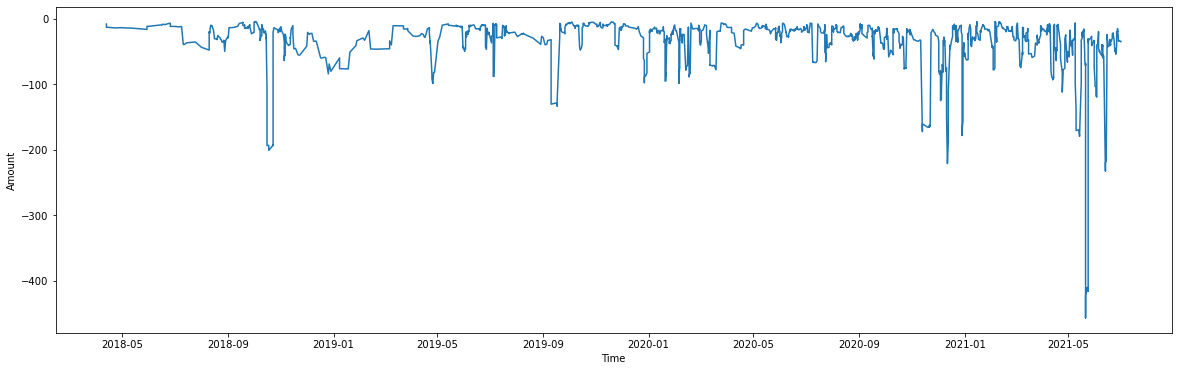

In [33]:
plt.figure(figsize = (20, 6))
plt.xlabel("Time")
plt.ylabel("Amount")

plt.plot(ma_acc_1248_negative)
plt.show()

#### Moving Average computed on a rolling window of 14 steps (multiple of weekly MA) 

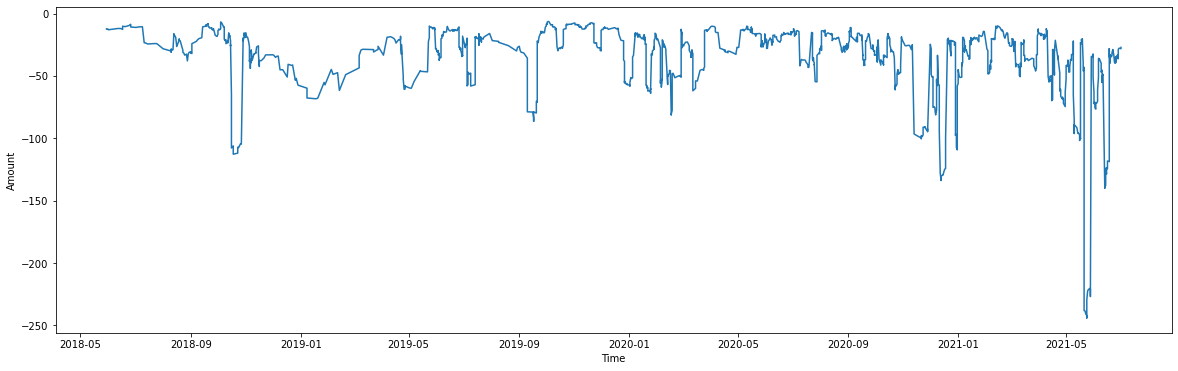

In [34]:
ma_acc_1248_negative = acc_1248_negative.amount.rolling(14).mean()
ma_acc_1248_negative = ma_acc_1248_negative[4:]

plt.figure(figsize = (20, 6))
plt.xlabel("Time")
plt.ylabel("Amount")

plt.plot(ma_acc_1248_negative)
plt.show()

## My solution! 

#### How I would do it in the most simple way.

- Check with recent data if it works 

In [35]:
acc_1248_negative = acc_1248_negative.reset_index()
acc_1248_negative

,date,account_id,amount
0,2018-01-04,1248,-6.00
1,2018-01-06,1248,-9.32
2,2018-01-06,1248,-13.13
3,2018-02-09,1248,-18.80
4,2018-02-10,1248,-6.29
...,...,...,...
1589,2021-06-28,1248,-125.00
1590,2021-06-28,1248,-40.08
1591,2021-06-29,1248,-9.99
1592,2021-07-01,1248,-15.99


In [37]:
acc_1248_negative_agg_by_date = acc_1248_negative.groupby('date')

In [38]:
for i, k in acc_1248_negative_agg_by_date:
    print(i, len(k))
    print(i, k)

2018-01-04 00:00:00 1
2018-01-04 00:00:00         date  account_id  amount
0 2018-01-04        1248    -6.0
2018-01-06 00:00:00 2
2018-01-06 00:00:00         date  account_id  amount
1 2018-01-06        1248   -9.32
2 2018-01-06        1248  -13.13
2018-02-09 00:00:00 1
2018-02-09 00:00:00         date  account_id  amount
3 2018-02-09        1248   -18.8
2018-02-10 00:00:00 1
2018-02-10 00:00:00         date  account_id  amount
4 2018-02-10        1248   -6.29
2018-04-13 00:00:00 3
2018-04-13 00:00:00         date  account_id  amount
5 2018-04-13        1248   -2.99
6 2018-04-13        1248   -1.00
7 2018-04-13        1248  -40.51
2018-04-14 00:00:00 1
2018-04-14 00:00:00         date  account_id  amount
8 2018-04-14        1248   -10.0
2018-04-23 00:00:00 1
2018-04-23 00:00:00         date  account_id  amount
9 2018-04-23        1248   -20.0
2018-04-30 00:00:00 1
2018-04-30 00:00:00          date  account_id  amount
10 2018-04-30        1248   -16.0
2018-05-06 00:00:00 1
2018-05-06 00

216 2019-01-08        1248  -104.0
2019-01-18 00:00:00 1
2019-01-18 00:00:00           date  account_id  amount
217 2019-01-18        1248    -9.8
2019-01-20 00:00:00 1
2019-01-20 00:00:00           date  account_id  amount
218 2019-01-20        1248    -5.0
2019-01-27 00:00:00 1
2019-01-27 00:00:00           date  account_id  amount
219 2019-01-27        1248    -8.0
2019-01-28 00:00:00 1
2019-01-28 00:00:00           date  account_id  amount
220 2019-01-28        1248   -28.0
2019-02-04 00:00:00 1
2019-02-04 00:00:00           date  account_id  amount
221 2019-02-04        1248   -11.0
2019-02-06 00:00:00 1
2019-02-06 00:00:00           date  account_id  amount
222 2019-02-06        1248  -65.85
2019-02-11 00:00:00 1
2019-02-11 00:00:00           date  account_id  amount
223 2019-02-11        1248    -1.0
2019-02-13 00:00:00 1
2019-02-13 00:00:00           date  account_id  amount
224 2019-02-13        1248  -206.2
2019-02-20 00:00:00 1
2019-02-20 00:00:00           date  account_id 

441 2019-10-06        1248   -10.0
2019-10-08 00:00:00 5
2019-10-08 00:00:00           date  account_id  amount
442 2019-10-08        1248   -5.99
443 2019-10-08        1248   -8.97
444 2019-10-08        1248   -5.90
445 2019-10-08        1248  -25.00
446 2019-10-08        1248  -14.43
2019-10-09 00:00:00 2
2019-10-09 00:00:00           date  account_id  amount
447 2019-10-09        1248   -7.99
448 2019-10-09        1248   -6.00
2019-10-10 00:00:00 1
2019-10-10 00:00:00           date  account_id  amount
449 2019-10-10        1248    -2.4
2019-10-11 00:00:00 3
2019-10-11 00:00:00           date  account_id  amount
450 2019-10-11        1248   -7.90
451 2019-10-11        1248  -17.62
452 2019-10-11        1248  -20.00
2019-10-12 00:00:00 2
2019-10-12 00:00:00           date  account_id  amount
453 2019-10-12        1248  -11.80
454 2019-10-12        1248  -45.84
2019-10-13 00:00:00 3
2019-10-13 00:00:00           date  account_id  amount
455 2019-10-13        1248 -179.99
456 2019-10-1

555 2019-12-23        1248   -60.0
2019-12-24 00:00:00 1
2019-12-24 00:00:00           date  account_id  amount
556 2019-12-24        1248  -18.49
2019-12-26 00:00:00 2
2019-12-26 00:00:00           date  account_id  amount
557 2019-12-26        1248   -19.5
558 2019-12-26        1248  -240.5
2019-12-27 00:00:00 3
2019-12-27 00:00:00           date  account_id  amount
559 2019-12-27        1248  -21.80
560 2019-12-27        1248 -256.48
561 2019-12-27        1248   -5.00
2019-12-29 00:00:00 2
2019-12-29 00:00:00           date  account_id  amount
562 2019-12-29        1248  -45.59
563 2019-12-29        1248   -9.99
2019-12-30 00:00:00 2
2019-12-30 00:00:00           date  account_id  amount
564 2019-12-30        1248   -2.99
565 2019-12-30        1248  -29.50
2020-01-02 00:00:00 3
2020-01-02 00:00:00           date  account_id  amount
566 2020-01-02        1248   -6.99
567 2020-01-02        1248  -28.40
568 2020-01-02        1248  -29.50
2020-01-03 00:00:00 1
2020-01-03 00:00:00       

694 2020-03-02        1248   -1.66
2020-03-03 00:00:00 1
2020-03-03 00:00:00           date  account_id  amount
695 2020-03-03        1248    -6.0
2020-03-04 00:00:00 1
2020-03-04 00:00:00           date  account_id  amount
696 2020-03-04        1248    -7.0
2020-03-06 00:00:00 1
2020-03-06 00:00:00           date  account_id  amount
697 2020-03-06        1248    -2.0
2020-03-08 00:00:00 3
2020-03-08 00:00:00           date  account_id  amount
698 2020-03-08        1248   -50.0
699 2020-03-08        1248   -90.0
700 2020-03-08        1248   -14.8
2020-03-10 00:00:00 3
2020-03-10 00:00:00           date  account_id  amount
701 2020-03-10        1248  -150.0
702 2020-03-10        1248   -50.0
703 2020-03-10        1248   -10.0
2020-03-11 00:00:00 4
2020-03-11 00:00:00           date  account_id  amount
704 2020-03-11        1248   -6.15
705 2020-03-11        1248  -11.30
706 2020-03-11        1248  -12.00
707 2020-03-11        1248  -17.50
2020-03-12 00:00:00 4
2020-03-12 00:00:00       

902 2020-07-24        1248  -15.75
2020-07-25 00:00:00 5
2020-07-25 00:00:00           date  account_id  amount
903 2020-07-25        1248  -36.00
904 2020-07-25        1248  -21.15
905 2020-07-25        1248   -5.45
906 2020-07-25        1248  -20.00
907 2020-07-25        1248  -11.24
2020-07-26 00:00:00 1
2020-07-26 00:00:00           date  account_id  amount
908 2020-07-26        1248 -203.08
2020-07-28 00:00:00 2
2020-07-28 00:00:00           date  account_id  amount
909 2020-07-28        1248   -8.29
910 2020-07-28        1248   -3.99
2020-07-29 00:00:00 1
2020-07-29 00:00:00           date  account_id  amount
911 2020-07-29        1248    -8.0
2020-07-30 00:00:00 2
2020-07-30 00:00:00           date  account_id  amount
912 2020-07-30        1248  -19.00
913 2020-07-30        1248   -2.99
2020-07-31 00:00:00 2
2020-07-31 00:00:00           date  account_id  amount
914 2020-07-31        1248  -36.32
915 2020-07-31        1248   -2.00
2020-08-01 00:00:00 1
2020-08-01 00:00:00       

1035 2020-09-24        1248    -7.2
2020-09-26 00:00:00 2
2020-09-26 00:00:00            date  account_id  amount
1036 2020-09-26        1248  -167.0
1037 2020-09-26        1248   -14.0
2020-09-28 00:00:00 2
2020-09-28 00:00:00            date  account_id  amount
1038 2020-09-28        1248  -16.00
1039 2020-09-28        1248   -3.99
2020-09-29 00:00:00 1
2020-09-29 00:00:00            date  account_id  amount
1040 2020-09-29        1248  -100.0
2020-09-30 00:00:00 4
2020-09-30 00:00:00            date  account_id  amount
1041 2020-09-30        1248  -17.02
1042 2020-09-30        1248   -2.99
1043 2020-09-30        1248  -52.00
1044 2020-09-30        1248   -9.99
2020-10-01 00:00:00 1
2020-10-01 00:00:00            date  account_id  amount
1045 2020-10-01        1248   -12.0
2020-10-02 00:00:00 1
2020-10-02 00:00:00            date  account_id  amount
1046 2020-10-02        1248   -7.85
2020-10-03 00:00:00 7
2020-10-03 00:00:00            date  account_id  amount
1047 2020-10-03       

1263 2021-02-04        1248   -3.65
2021-02-05 00:00:00 5
2021-02-05 00:00:00            date  account_id  amount
1264 2021-02-05        1248   -2.70
1265 2021-02-05        1248   -3.90
1266 2021-02-05        1248  -10.45
1267 2021-02-05        1248   -5.60
1268 2021-02-05        1248   -1.90
2021-02-06 00:00:00 4
2021-02-06 00:00:00            date  account_id  amount
1269 2021-02-06        1248   -11.0
1270 2021-02-06        1248   -41.5
1271 2021-02-06        1248    -9.9
1272 2021-02-06        1248  -120.0
2021-02-07 00:00:00 7
2021-02-07 00:00:00            date  account_id  amount
1273 2021-02-07        1248  -12.00
1274 2021-02-07        1248  -50.00
1275 2021-02-07        1248   -5.60
1276 2021-02-07        1248  -11.65
1277 2021-02-07        1248   -2.40
1278 2021-02-07        1248   -3.90
1279 2021-02-07        1248   -2.70
2021-02-09 00:00:00 1
2021-02-09 00:00:00            date  account_id  amount
1280 2021-02-09        1248   -3.65
2021-02-10 00:00:00 2
2021-02-10 00:00:0

1517 2021-06-01        1248 -129.00
2021-06-02 00:00:00 2
2021-06-02 00:00:00            date  account_id  amount
1518 2021-06-02        1248   -14.0
1519 2021-06-02        1248  -142.0
2021-06-03 00:00:00 5
2021-06-03 00:00:00            date  account_id  amount
1520 2021-06-03        1248  -23.80
1521 2021-06-03        1248  -29.90
1522 2021-06-03        1248   -9.95
1523 2021-06-03        1248  -29.54
1524 2021-06-03        1248  -31.98
2021-06-04 00:00:00 1
2021-06-04 00:00:00            date  account_id  amount
1525 2021-06-04        1248    -6.4
2021-06-05 00:00:00 4
2021-06-05 00:00:00            date  account_id  amount
1526 2021-06-05        1248  -28.39
1527 2021-06-05        1248   -2.70
1528 2021-06-05        1248  -49.95
1529 2021-06-05        1248 -174.99
2021-06-06 00:00:00 4
2021-06-06 00:00:00            date  account_id  amount
1530 2021-06-06        1248  -40.50
1531 2021-06-06        1248  -49.50
1532 2021-06-06        1248   -2.70
1533 2021-06-06        1248  -22.6

### Take the mean in each dataframe that results from the aggregation process 

In [67]:
dates = []
mean_trs = []
for i, k in acc_1248_negative_agg_by_date:
    print(i, len(k))
    dates.append(i)
    mean_trs.append(k.amount.mean())

2018-01-04 00:00:00 1
2018-01-06 00:00:00 2
2018-02-09 00:00:00 1
2018-02-10 00:00:00 1
2018-04-13 00:00:00 3
2018-04-14 00:00:00 1
2018-04-23 00:00:00 1
2018-04-30 00:00:00 1
2018-05-06 00:00:00 1
2018-05-12 00:00:00 1
2018-05-30 00:00:00 2
2018-06-01 00:00:00 2
2018-06-12 00:00:00 1
2018-06-15 00:00:00 1
2018-06-16 00:00:00 1
2018-06-17 00:00:00 2
2018-06-20 00:00:00 1
2018-06-24 00:00:00 1
2018-06-26 00:00:00 2
2018-07-02 00:00:00 1
2018-07-05 00:00:00 1
2018-07-06 00:00:00 1
2018-07-09 00:00:00 1
2018-07-11 00:00:00 1
2018-07-12 00:00:00 1
2018-07-15 00:00:00 1
2018-07-21 00:00:00 1
2018-07-25 00:00:00 1
2018-08-01 00:00:00 1
2018-08-10 00:00:00 5
2018-08-11 00:00:00 2
2018-08-12 00:00:00 1
2018-08-13 00:00:00 2
2018-08-15 00:00:00 1
2018-08-16 00:00:00 2
2018-08-18 00:00:00 1
2018-08-19 00:00:00 3
2018-08-20 00:00:00 1
2018-08-23 00:00:00 2
2018-08-24 00:00:00 1
2018-08-25 00:00:00 1
2018-08-27 00:00:00 2
2018-08-28 00:00:00 1
2018-08-29 00:00:00 1
2018-08-30 00:00:00 1
2018-08-31

#### Build a dataframe with the result of the previous computation

In [103]:
df_1248_mean_daily_agg = pd.DataFrame({'date':dates, 'daily_mean': mean_trs})

In [104]:
df_1248_mean_daily_agg

,date,daily_mean
0,2018-01-04,-6.000000
1,2018-01-06,-11.225000
2,2018-02-09,-18.800000
3,2018-02-10,-6.290000
4,2018-04-13,-14.833333
...,...,...
716,2021-06-26,-12.275000
717,2021-06-27,-19.056667
718,2021-06-28,-82.540000
719,2021-06-29,-9.990000


### Chose your interval of interests in the data and apply interpolation. 

In [85]:
seven_months_data = df_1248_mean_daily_agg[510:]

In [86]:
seven_months_data

,date,daily_mean
510,2020-10-03,-27.020000
511,2020-10-04,-4.400000
512,2020-10-05,-234.960000
513,2020-10-07,-23.453333
514,2020-10-09,-26.595000
...,...,...
716,2021-06-26,-12.275000
717,2021-06-27,-19.056667
718,2021-06-28,-82.540000
719,2021-06-29,-9.990000
